In [159]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
%matplotlib inline
from match_sat_data import match_par

from njord2 import modis, seawifs, match

In [135]:
df = pd.read_hdf("indata/mapps_daily_sat.h5")
ds = xr.open_dataset("upstream_files/mapps_upstream_sat_365.nc")

-17.18 66.75


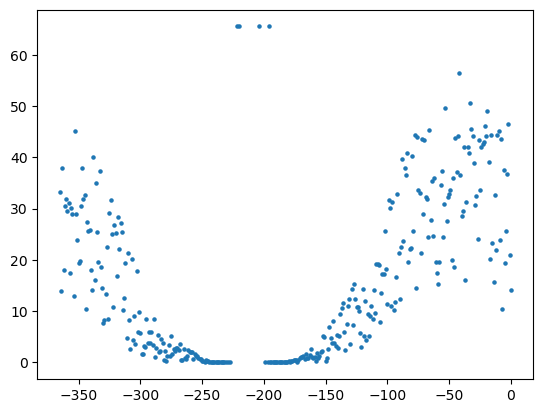

In [185]:
plt.scatter(ds.days_from_obs, ds.par[671,:], 5)
print(ds.lon[671].values, ds.lat[671].values)

In [137]:
idpos = np.nonzero((df.lon==ds.lon[671].values).values)[0][0]
par = match_par(df.iloc[idpos:idpos+2], days_behind=365)

2006-07-23: 100%|██████████| 368/368 [04:52<00:00,  1.26it/s]
/users/rsg-new/brj/projects/forest/mapps_forest/match_sat_data.py:34: RuntimeWarning: Mean of empty slice
  return np.nanmean((marr,sarr),axis=0)


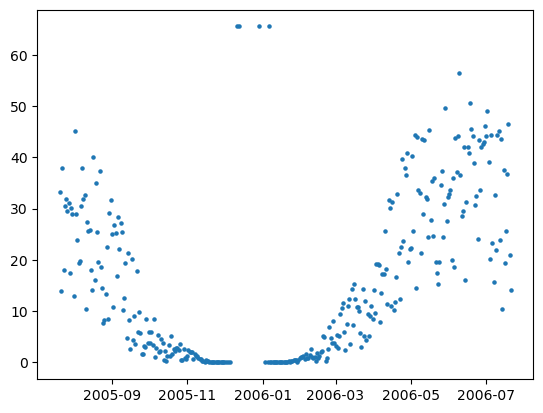

In [190]:
plt.scatter(ds.date[671,:], par[0,:], 5)
#plt.xlim(pd.to_datetime("2006-01-05"), pd.to_datetime("2006-01-10"))

In [ ]:
timetype = "day"
mt = match.Match(modis, dskw={"timetype":timetype})

In [229]:
mopar = mt.sameday(df.lon[idpos], df.lat[idpos], pd.to_datetime("2006-01-06"), "par")
print(mopar)
df.lon[idpos],df.lat[idpos]
ivec,jvec =mt.ll2ij(df.lon[idpos],df.lat[idpos])

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

65.5


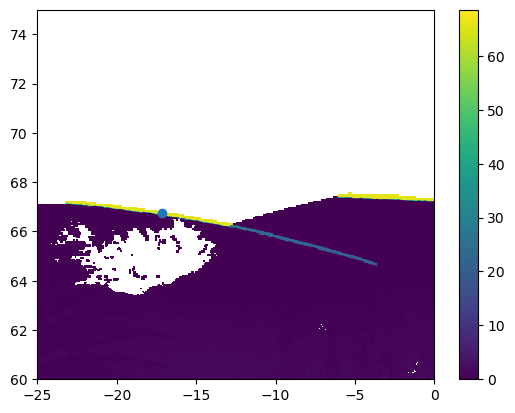

In [228]:
md = modis.open_dataset("2006-01-06", timetype="day")
plt.pcolormesh(md.lon, md.lat, md.par.values)
plt.xlim(-25,0)
plt.ylim(60,75)
plt.colorbar()
plt.scatter(-17.18, 66.75)

[[65.5]]


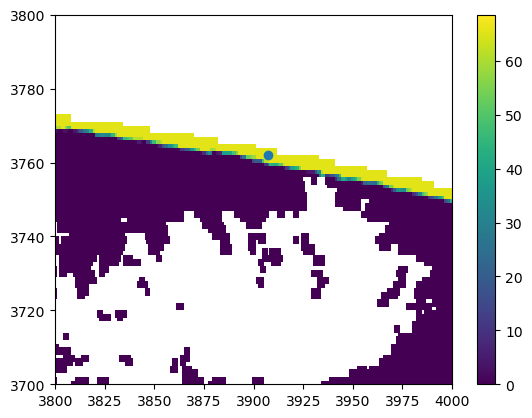

In [226]:
md = modis.open_dataset(pd.to_datetime("2006-01-06"), timetype="day")
plt.pcolormesh(md.par.values)
plt.colorbar()
plt.scatter(ivec,jvec)
plt.xlim(3800,4000)
plt.ylim(3700,3800)
print(md.par.values[jvec,ivec])